In [1]:
import pacmap
import numpy as np

from utils import *

def gauss_clusters(
    n_clusters=10, dim=10, pts_cluster=100, random_state=None, cov=1, stepsize=1,
):

    if random_state is None:
        rng = np.random.RandomState()
    else:
        rng = random_state

    n = n_clusters * pts_cluster

    s = stepsize / np.sqrt(dim)
    means = np.linspace(np.zeros(dim), n_clusters * s, num=n_clusters, endpoint=False)
    cshift_mask = np.zeros(n_clusters, dtype=bool)
    cshift_mask[15] = True
    cov = np.eye(dim) * cov

    clusters = np.array(
        [rng.multivariate_normal(m, cov, size=(pts_cluster)) for m in means]
    )

    X = np.reshape(clusters, (-1, dim))

    y = np.repeat(np.arange(n_clusters), pts_cluster)
    return X, y

data, labels = gauss_clusters(
    n_clusters=20,
    dim=50,
    pts_cluster=1000,
    stepsize=6,
    random_state=None,
)

print(data.shape, labels.shape)

(20000, 50) (20000,)


In [5]:
Zs = []
params = [
    [8, 0.768, 4.0], 
    [266, 0.78275779, 2.50482493], 
    [8, 1.0, 4.8],
    [177, 0.78275779, 2.60919263]
]

for param in params:
    reducer = pacmap.PaCMAP(n_neighbors=param[0], MN_ratio=param[1], FP_ratio=param[2])
    z = reducer.fit_transform(data)
    Zs.append(normalise(z))

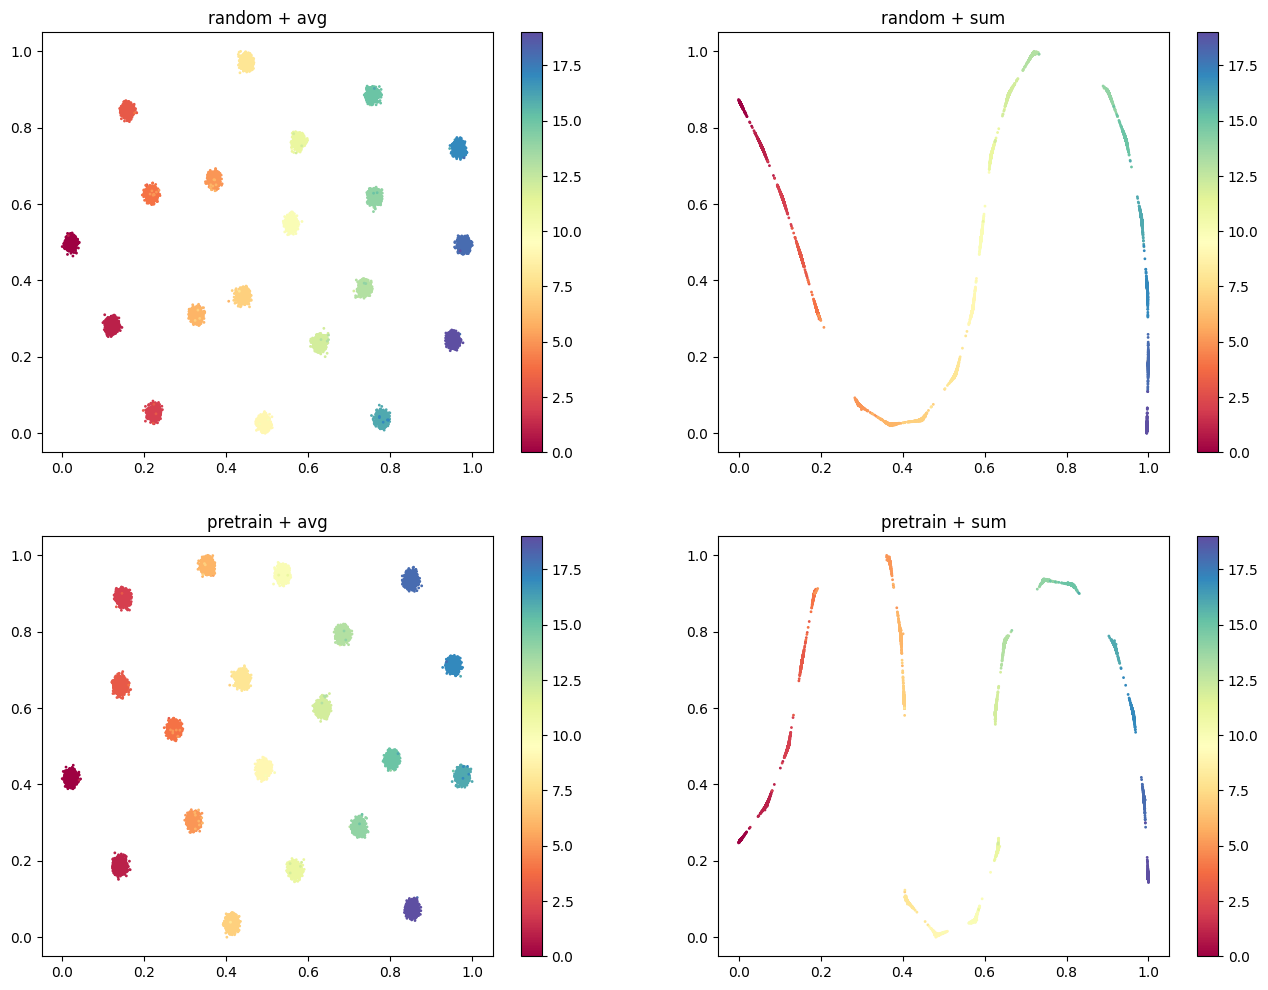

In [27]:
plt.figure(figsize=(16,12))

# plt.fontsize = 5
# plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.subplot(221)
plt.scatter(Zs[0][:, 0], Zs[0][:, 1], s=1, c=labels, cmap="Spectral")
plt.title("random + avg")
plt.colorbar()

plt.subplot(222)
plt.scatter(Zs[1][:, 0], Zs[1][:, 1], s=1, c=labels, cmap="Spectral")
plt.title("random + sum")
plt.colorbar()

plt.subplot(223)
plt.scatter(Zs[2][:, 0], Zs[2][:, 1], s=1, c=labels, cmap="Spectral")
plt.title("pretrain + avg")
plt.colorbar()

plt.subplot(224)
plt.scatter(Zs[3][:, 0], Zs[3][:, 1], s=1, c=labels, cmap="Spectral")
plt.title("pretrain + sum")
plt.colorbar()

plt.show()